In [1]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
from numpy import *
from numpy.linalg import multi_dot
import yfinance as yf

# Plot settings
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = 16, 8

In [61]:
symbols = ['AAPL', 'AMZN', 'FB', 'GOOG', 'NFLX' ]

# Number of assets
num_assets = len(symbols)

# Number of portfolio for optimization
numofportfolio = 5000

In [3]:
df = yf.download(symbols, start='2015-01-01', end='2020-12-31', progress=False)['Adj Close']

In [4]:
df.head()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2014-12-31,25.100164,310.350006,78.019997,524.958740,48.801430
2015-01-02,24.861401,308.519989,78.449997,523.373108,49.848572
2015-01-05,24.161013,302.190002,77.190002,512.463013,47.311428
2015-01-06,24.163294,295.290009,76.150002,500.585632,46.501431
2015-01-07,24.502111,298.420013,76.150002,499.727997,46.742859


In [8]:
#Let's save the data for future use
df.to_csv('stocks.csv')

In [10]:
df = pd.read_csv('/Users/kp/stocks.csv', index_col=0, parse_dates=True)

In [11]:
df.head()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2014-12-31,25.100164,310.350006,78.019997,524.958740,48.801430
2015-01-02,24.861401,308.519989,78.449997,523.373108,49.848572
2015-01-05,24.161013,302.190002,77.190002,512.463013,47.311428
2015-01-06,24.163294,295.290009,76.150002,500.585632,46.501431
2015-01-07,24.502111,298.420013,76.150002,499.727997,46.742859


In [13]:
summary  = df.describe().T

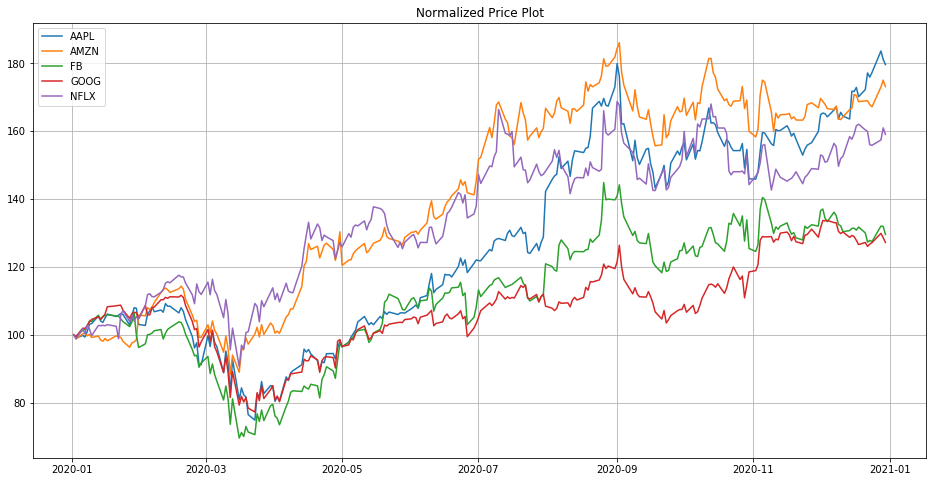

In [20]:
# Visualize Data 

fig = plt.figure(figsize = (16,8))
ax = plt.axes()
ax.set_title('Normalized Price Plot')
ax.plot(df[-252:]/df.iloc[-252]*100)
ax.legend(df.columns,loc = 'upper left')
ax.grid(True)

In [21]:
# Returns 
returns = df.pct_change().fillna(0)

In [22]:
returns.head()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2014-12-31,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-02,-0.009512,-0.005897,0.005511,-0.003020,0.021457
2015-01-05,-0.028172,-0.020517,-0.016061,-0.020846,-0.050897
2015-01-06,0.000094,-0.022833,-0.013473,-0.023177,-0.017121
2015-01-07,0.014022,0.010600,0.000000,-0.001713,0.005192


In [35]:
arithmetic_returns = returns.mean()*252
arithmetic_returns

AAPL    0.322809
AMZN    0.441315
FB      0.259281
GOOG    0.235901
NFLX    0.485378
dtype: float64

In [26]:
returns_modified= 1+returns

In [50]:
#geometric_returns = np.prod(returns_modified,axis = 0)**(1/252)-1

In [54]:
#(1+geometric_returns)**252-1

AAPL    4.319506
AMZN    9.587563
FB      2.484619
GOOG    2.313632
NFLX    9.749481
dtype: float64

Text(0.5, 1.0, 'Annualized Returns (in %)')

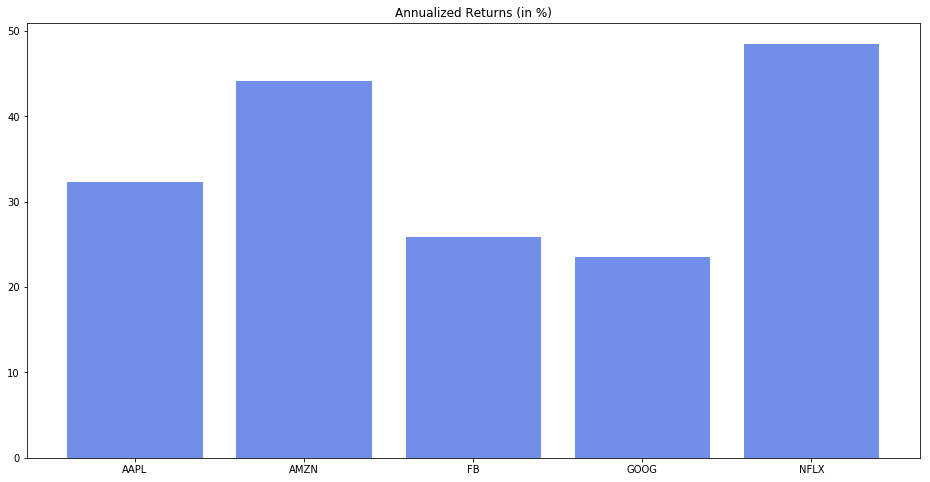

In [55]:
fig = plt.figure()
ax =plt.axes()

ax.bar(annual_returns.index, annual_returns*100, color='royalblue', alpha=0.75)
ax.set_title('Annualized Returns (in %)')

In [56]:
vol = returns.std()

In [59]:
annual_vols = vol*sqrt(252)
annual_vols

AAPL    0.296234
AMZN    0.309746
FB      0.318445
GOOG    0.269152
NFLX    0.424308
dtype: float64

Text(0.5, 1.0, 'Annualized Volatility (in %)')

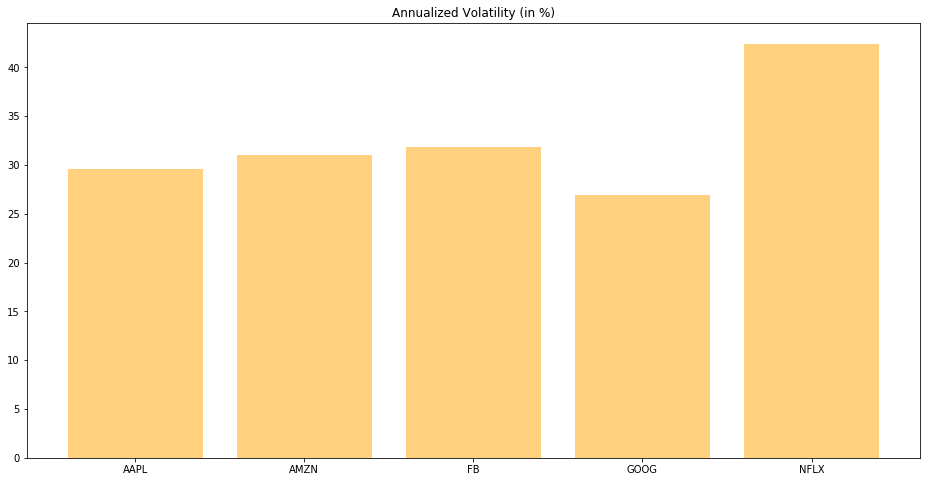

In [60]:
# Visualize the data
fig = plt.figure()
ax = plt.axes()

ax.bar(annual_vols.index, annual_vols*100, color='orange', alpha=0.5)
ax.set_title('Annualized Volatility (in %)')

### Equal Weighted Portfolio;  

Assume a portoflio composed of all five stocks with equal weighting. We will now calculate the portfolio statistics.

In [89]:
wts = num_assets*[1./num_assets]# this is a list 
weights = num_assets*[1./num_assets]
array(wts).shape # convert into array 
len(weights)

5

In [73]:
wts = array(wts).reshape(5,-1) # convert into 2 d array

In [74]:
wts

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

### Portfolio Return 

In [77]:
ret = array(arithmetic_returns).reshape(5,-1)  #mu

In [78]:
ret

array([[0.32280853],
       [0.44131467],
       [0.25928094],
       [0.23590147],
       [0.4853782 ]])

In [79]:
# portfolio returns 

In [80]:
portfolio_ret = wts.T@ret

In [81]:
portfolio_ret

array([[0.34893676]])

### Portfolio Volatility

In [82]:
cov = returns.cov() * 252
cov

,AAPL,AMZN,FB,GOOG,NFLX
AAPL,0.087755,0.050748,0.054291,0.048356,0.051779
AMZN,0.050748,0.095943,0.059241,0.054240,0.069120
FB,0.054291,0.059241,0.101407,0.057359,0.060010
GOOG,0.048356,0.054240,0.057359,0.072443,0.054454
NFLX,0.051779,0.069120,0.060010,0.054454,0.180037


In [84]:
#portfolio volatility 
p_var = wts.T@cov@wts

In [87]:
p_vol = sqrt(p_var)

In [88]:
p_vol

,0
0,0.257432


### Portfolio Statistics

In [102]:
def Portfolio_Stats(weights,returns):
    num = len(weights)
    wts = array(weights).reshape(num,-1)
    ret = array(returns.mean()*252).reshape(num,-1)
    cov = returns.cov() * 252
    p_ret = wts.T@ret
    p_var = wts.T@cov@wts
    p_vol = sqrt(p_var)
    return np.array([p_ret, p_vol, p_ret/p_vol]).flatten()


Portfolio_Stats(weights,returns)[0]

0.3489367602166924

### Portfolio Simulation 
Now, we will implement a Monte Carlo simulation to generate random portfolio weights on a larger scale and calculate the expected portfolio return, variance and sharpe ratio for every simulated allocation. We will then identify the portfolio with a highest return for per unit of risk.

In [95]:
w = random.random(num_assets).reshape(len(wts),-1)

In [96]:
w

array([[0.46318984],
       [0.13433071],
       [0.46364356],
       [0.35149527],
       [0.79506266]])

In [97]:
# sum of weights = 1
w/=sum(w)

In [100]:
sum(w)
num_assets

5

In [116]:
def Monte_Carlo_Portfolio(returns,num_assets,n):
    rets=[];vols=[];wts=[]
    for i in range(n):
        weights = random.random(num_assets).reshape(num_assets,-1)
        weights/=sum(weights)
        rets.append(Portfolio_Stats(weights,returns)[0])
        vols.append(Portfolio_Stats(weights,returns)[1])
        wts.append(weights.flatten())
    return np.array([rets,vols,wts])


p_rets = Monte_Carlo_Portfolio(returns,num_assets,5000)[0]
p_vols = Monte_Carlo_Portfolio(returns,num_assets,5000)[1]
p_wts = Monte_Carlo_Portfolio(returns,num_assets,5000)[2]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


In [114]:
#def Monte_Carlo_Portfolio(returns,num_assets,n):
   
    #Portfolio = {"Returns":[],"Volatility":[],"Weights":[]}
    #Portfolio["Returns"].append([np.array([Portfolio_Stats(random.random(num_assets)/sum(random.random(num_assets)),returns)[0]for i in range(n)])])                                                                            
    #rets.append([np.array([Portfolio_Stats(random.random(num_assets)/sum(random.random(num_assets)),returns)[0] for i in range(n)])
    #return Portfolio
    
    
#Monte_Carlo_Portfolio(returns,num_assets,1000)

{'Returns': [[array([0.27562179, 0.30683129, 0.90700151, 0.15361442, 0.28311105,
          0.35406875, 0.42887482, 0.40513056, 0.44518223, 0.58318628,
          0.35020928, 0.32847299, 0.31798463, 0.36955713, 0.57458297,
          0.3868258 , 0.39349293, 0.48290278, 0.27490344, 0.43248588,
          0.34321279, 0.62419384, 0.52152459, 0.38598934, 0.35205665,
          0.26972757, 0.22451565, 0.30531218, 0.34423442, 0.37942118,
          0.41534939, 0.50477181, 0.12495557, 0.30843832, 0.37148172,
          0.20115259, 0.28888521, 0.44145281, 0.24138501, 0.19716422,
          0.3437906 , 0.76786739, 0.20946247, 0.13217828, 0.37821434,
          0.29205765, 0.41304037, 0.29885276, 0.48318466, 0.32464134,
          0.15224533, 0.39839377, 0.49702161, 0.26892861, 0.56294566,
          0.52262343, 0.38383631, 0.66524643, 0.35028004, 0.2793815 ,
          0.56018336, 0.4443749 , 0.33880668, 0.30850061, 0.34585641,
          0.37471232, 0.31344532, 0.24880265, 0.55320075, 0.57755708,
         

In [111]:
p_ret.shape

(500,)

In [121]:
Result = pd.DataFrame({"Returns":p_rets,"Volatility":p_vols,"Weights":p_wts,"Sharpe Ratio":p_rets/p_vols})#columns = ['Returns','Volatility','Weights'])

In [122]:
Result.head()

,Returns,Volatility,Weights,Sharpe Ratio
0,0.305197,0.256726,"[0.07465304146503324, 0.22350837016438932, 0.3...",1.18881
1,0.322112,0.286375,"[0.2490808253927417, 0.21501260269791084, 0.10...",1.12479
2,0.360882,0.273767,"[0.15717570759658753, 0.054790290145876774, 0....",1.31821
3,0.356637,0.271868,"[0.31653491516746973, 0.010596046393949923, 0....",1.3118
4,0.358824,0.253977,"[0.10880808184822538, 0.3258543989793016, 0.01...",1.41282


### Maximum Sharpe Ratio Portfolio 

In [132]:
# Max sharpe ratio portfolio 
Result['Sharpe Ratio'] = Result['Sharpe Ratio'].astype('float64')
msrp = Result.iloc[Result['Sharpe Ratio'].idxmax()]
max_sr_wts = msrp[2]
msrp

Returns                                                  0.436205
Volatility                                               0.248709
Weights         [0.35432817367535063, 0.08073157410146917, 0.0...
Sharpe Ratio                                              1.75387
Name: 1774, dtype: object

In [129]:
# Allocation of weights 
allocation = dict(zip(symbols,np.around(max_sr_wts*100,2)))

In [130]:
allocation

{'AAPL': 35.43, 'AMZN': 8.07, 'FB': 8.68, 'GOOG': 22.74, 'NFLX': 25.08}

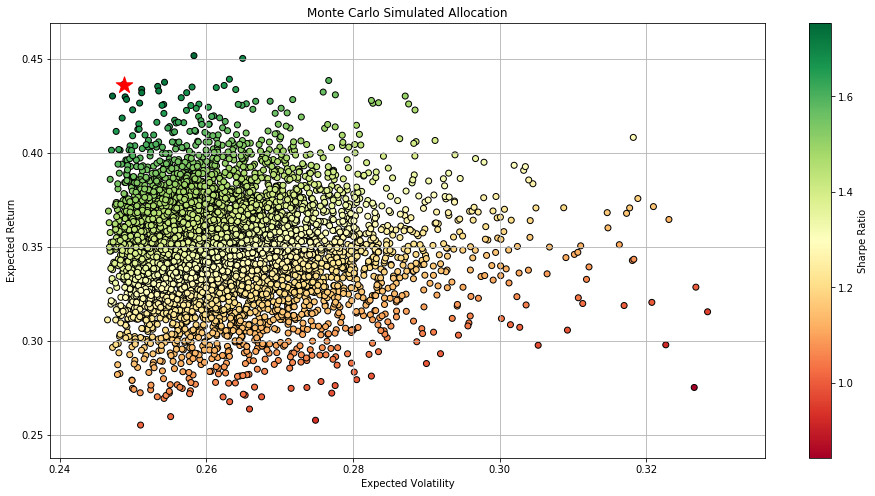

In [131]:
fig = plt.figure()
ax = plt.axes()

ax.set_title('Monte Carlo Simulated Allocation')

# Simulated portfolios
fig.colorbar(ax.scatter(p_vols, p_rets, c=p_rets / p_vols, 
                        marker='o', cmap='RdYlGn', edgecolors='black'), label='Sharpe Ratio') 

# Maximum sharpe ratio portfolio
ax.scatter(msrp['Volatility'], msrp['Returns'], c='red', marker='*', s = 300, label='Max Sharpe Ratio')

ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')
ax.grid(True)